$ conda install -c conda-forge librosa

In [1]:
import os
import wave
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import warnings
from scipy import signal
from scipy import fromstring, int16
warnings.filterwarnings('ignore')

In [2]:
INPUT_DIR = "../data/input/cats_dogs/cats_dogs/"
data_list = os.listdir(INPUT_DIR)
y = [0 if 'cat' in f else 1 for f in data_list]

In [3]:
data_list[:5]

['cat_1.wav', 'cat_10.wav', 'cat_100.wav', 'cat_101.wav', 'cat_102.wav']

In [4]:
# ファイル読み込み
read_file = os.path.join(INPUT_DIR, data_list[0])
wr = wave.open(read_file, 'r')
# wavファイルのステータス
ch = wr.getnchannels()
width = wr.getsampwidth()
fr = wr.getframerate()
fn = wr.getnframes()
print("Channel: ", ch)
print("Sample width: ", width)
print("Frame Rate: ", fr)
print("Frame num: ", fn)
print("Params: ", wr.getparams())
print("Total time: ", 1.0 * fn / fr)
# waveの実データを取得し、数値化
data = wr.readframes(wr.getnframes())
wr.close()
X = fromstring(data, dtype=int16)

Channel:  1
Sample width:  2
Frame Rate:  16000
Frame num:  179200
Params:  _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=179200, comptype='NONE', compname='not compressed')
Total time:  11.2


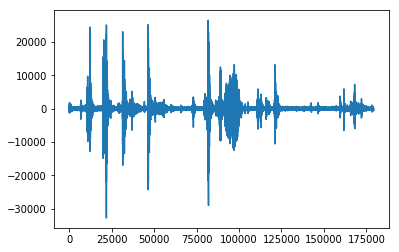

In [5]:
plt.figure()
plt.plot(X)
plt.show()

In [6]:
ipd.display(ipd.Audio(X, rate=fr))

In [7]:
# フーリエ解析
sampleFreqs, segmentTimes, sxx = signal.spectrogram(X, fr)

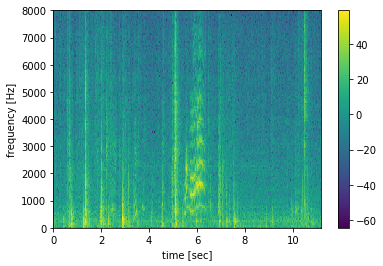

In [8]:
# 周波数解析の可視化
plt.figure()
plt.pcolormesh(segmentTimes,sampleFreqs,10*np.log10(sxx+1e-15))
plt.colorbar()
plt.xlabel(u"time [sec]")
plt.ylabel(u"frequency [Hz]")
plt.show()

In [9]:
# librosaを使って特徴量抽出
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

In [10]:
mfccs,chroma,mel,contrast,tonnetz = extract_feature(read_file)